# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [66]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


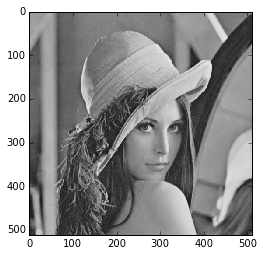

In [9]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)
io.imshow(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


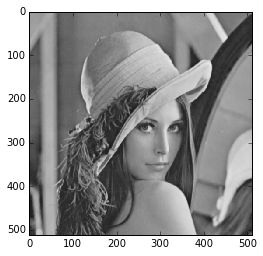

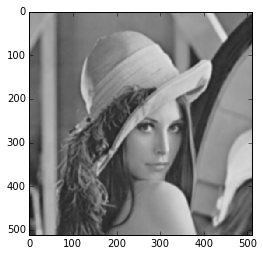

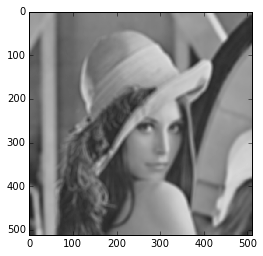

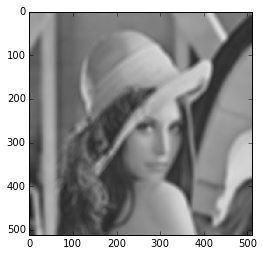

In [13]:
from skimage.filter.rank import mean
from skimage.morphology import disk
    
plt.figure()

lena_mean_disk1 = mean(lena_im,disk(1))
io.imshow(lena_mean_disk1, cmap=plt.cm.gray)

plt.figure()
lena_mean_disk3 = mean(lena_im,disk(3))
io.imshow(lena_mean_disk3, cmap=plt.cm.gray)

plt.figure()
lena_mean_disk5 = mean(lena_im,disk(5))
io.imshow(lena_mean_disk5, cmap=plt.cm.gray)

plt.figure()
lena_mean_disk7 = mean(lena_im,disk(7))
io.imshow(lena_mean_disk7, cmap=plt.cm.gray)

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

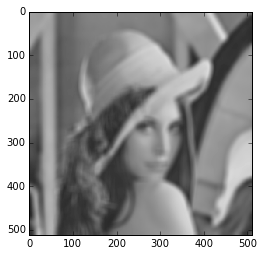

In [41]:
def mean_filter(n):
    H = (1/(n*n))*np.ones((n,n))
    return H

from scipy.ndimage import filters
lena_mean3_conv = filters.convolve(lena_im,mean_filter(14))

io.imshow(lena_mean3_conv, cmap = plt.cm.gray)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [31]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

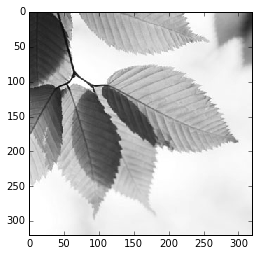

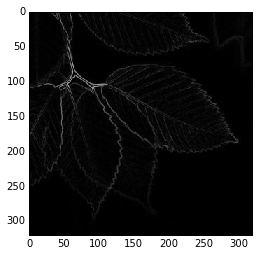

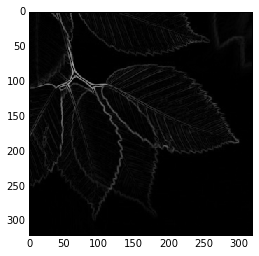

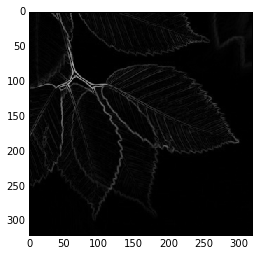

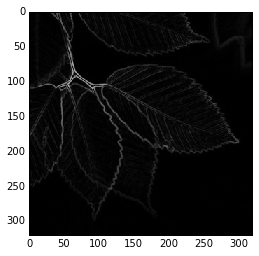

In [39]:
leaves_im = io.imread(Path.__add__('leaves.jpg'),as_grey=True)
plt.figure()
io.imshow(leaves_im)
leaves_rob = filters.roberts(leaves_im)
plt.figure()
io.imshow(leaves_rob)

leaves_pre = filters.prewitt(leaves_im)
plt.figure()
io.imshow(leaves_pre)

leaves_sob = filters.sobel(leaves_im)
plt.figure()
io.imshow(leaves_sob)

leaves_sch = filters.scharr(leaves_im)
plt.figure()
io.imshow(leaves_sch)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

/home/masters/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


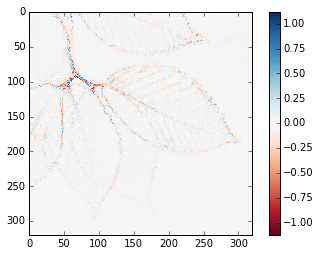

In [85]:
from scipy.ndimage import filters
leaves_lap = filters.laplace(leaves_im)
io.imshow(leaves_lap)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [44]:
from skimage import util

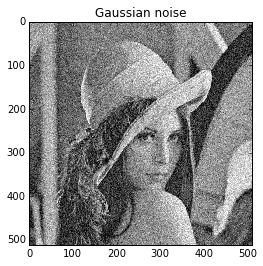

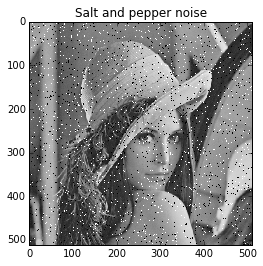

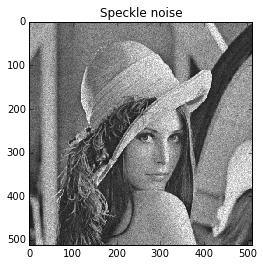

In [45]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


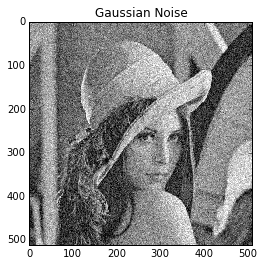

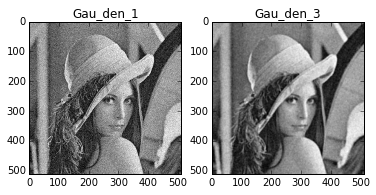

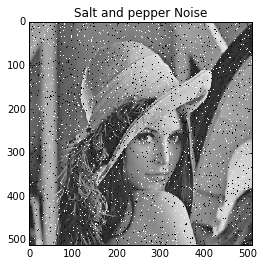

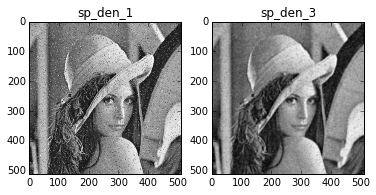

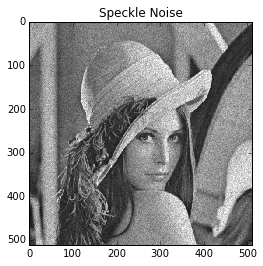

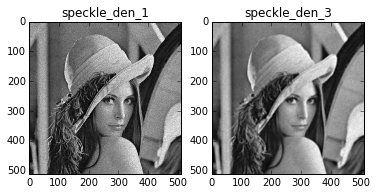

In [97]:
from skimage import filters

plt.figure(1)
io.imshow(lena_gaussian)
plt.title('Gaussian Noise')

plt.figure(2)
plt.subplot(121)
lena_gau_mean_disk1 = filters.rank.mean(lena_gaussian, disk(1))
plt.imshow(lena_gau_mean_disk1, cmap=plt.cm.gray)
plt.title('Gau_den_1')

plt.subplot(122)
lena_gau_mean_disk3 = filters.rank.mean(lena_gaussian, disk(3))
plt.imshow(lena_gau_mean_disk3, cmap=plt.cm.gray)
plt.title('Gau_den_3')

plt.figure(3)
io.imshow(lena_sp)
plt.title('Salt and pepper Noise')

plt.figure(4)
plt.subplot(121)
lena_sp_mean_disk1 = filters.rank.mean(lena_sp, disk(1))
plt.imshow(lena_sp_mean_disk1, cmap=plt.cm.gray)
plt.title('sp_den_1')

plt.subplot(122)
lena_sp_mean_disk3 = filters.rank.mean(lena_sp, disk(3))
plt.imshow(lena_sp_mean_disk3, cmap=plt.cm.gray)
plt.title('sp_den_3')

plt.figure(5)
io.imshow(lena_speckle)
plt.title('Speckle Noise')

plt.figure(6)
plt.subplot(121)
lena_speckle_mean_disk1 = filters.rank.mean(lena_speckle, disk(1))
plt.imshow(lena_speckle_mean_disk1, cmap=plt.cm.gray)
plt.title('speckle_den_1')

plt.subplot(122)
lena_speckle_mean_disk3 = filters.rank.mean(lena_speckle, disk(3))
plt.imshow(lena_speckle_mean_disk3, cmap=plt.cm.gray)
plt.title('speckle_den_3')





** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


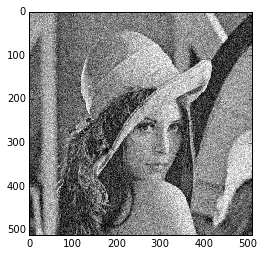

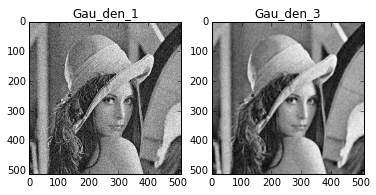

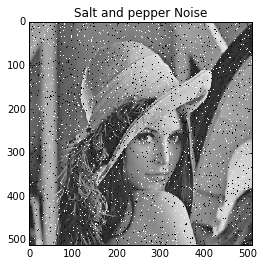

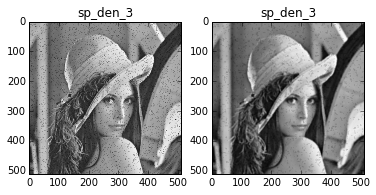

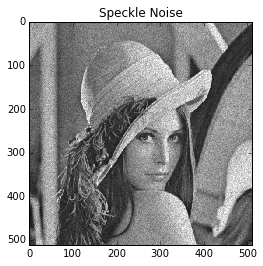

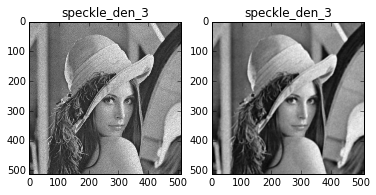

In [83]:
plt.figure(1)
io.imshow(lena_gaussian)

plt.figure(2)
plt.subplot(121)
lena_gau_mean_per_disk1 = filters.rank.mean_percentile(lena_gaussian, disk(1),p0=0.05,p1=0.95)
plt.imshow(lena_gau_mean_per_disk1, cmap=plt.cm.gray)
plt.title('Gau_den_1')

plt.subplot(122)
lena_gau_mean_per_disk3 = filters.rank.mean_percentile(lena_gaussian, disk(3),p0=0.05,p1=0.95)
plt.imshow(lena_gau_mean_per_disk3, cmap=plt.cm.gray)
plt.title('Gau_den_3')

plt.figure(3)
io.imshow(lena_sp)
plt.title('Salt and pepper Noise')

plt.figure(4)
plt.subplot(121)
lena_sp_mean_per_disk1 = filters.rank.mean_percentile(lena_sp, disk(1),p0=0.05,p1=0.95)
plt.imshow(lena_sp_mean_per_disk1, cmap=plt.cm.gray)
plt.title('sp_den_3')

plt.subplot(122)
lena_sp_mean_per_disk3 = filters.rank.mean_percentile(lena_sp, disk(3),p0=0.05,p1=0.95)
plt.imshow(lena_sp_mean_per_disk3, cmap=plt.cm.gray)
plt.title('sp_den_3')


plt.figure(5)
io.imshow(lena_speckle)
plt.title('Speckle Noise')

plt.figure(6)
plt.subplot(121)
lena_speckle_mean_per_disk1 = filters.rank.mean_percentile(lena_speckle, disk(1),p0=0.05,p1=0.95)
plt.imshow(lena_speckle_mean_per_disk1, cmap=plt.cm.gray)
plt.title('speckle_den_3')

plt.subplot(122)
lena_speckle_mean_per_disk3 = filters.rank.mean_percentile(lena_speckle, disk(3),p0=0.05,p1=0.95)
plt.imshow(lena_speckle_mean_per_disk3, cmap=plt.cm.gray)
plt.title('speckle_den_3')

** median filter: **

/home/masters/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


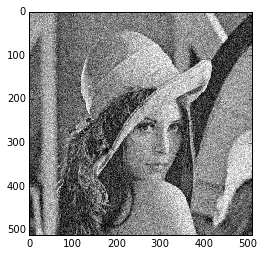

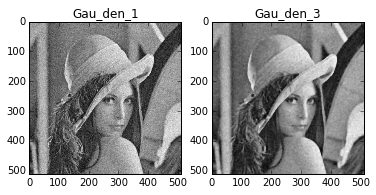

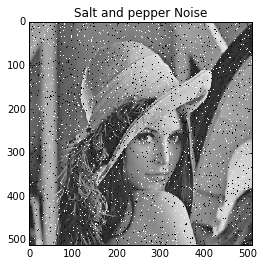

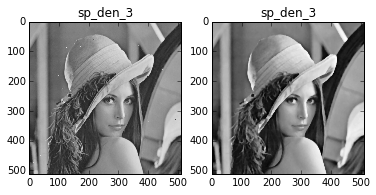

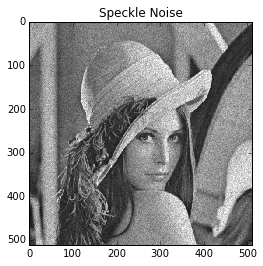

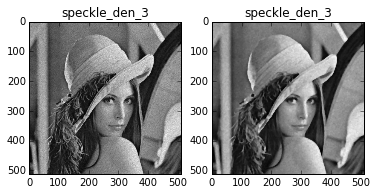

In [84]:
plt.figure(1)
io.imshow(lena_gaussian)

plt.figure(2)
plt.subplot(121)
lena_gau_mead_disk1 = filters.rank.median(lena_gaussian, disk(1))
plt.imshow(lena_gau_mead_disk1, cmap=plt.cm.gray)
plt.title('Gau_den_1')

plt.subplot(122)
lena_gau_mead_disk3 = filters.rank.median(lena_gaussian, disk(3))
plt.imshow(lena_gau_mead_disk3, cmap=plt.cm.gray)
plt.title('Gau_den_3')


plt.figure(3)
io.imshow(lena_sp)
plt.title('Salt and pepper Noise')

plt.figure(4)
plt.subplot(121)
lena_sp_mead_disk1 = filters.rank.median(lena_sp, disk(1))
plt.imshow(lena_sp_mead_disk1, cmap=plt.cm.gray)
plt.title('sp_den_3')

plt.subplot(122)
lena_sp_mead_disk3 = filters.rank.median(lena_sp, disk(3))
plt.imshow(lena_sp_mead_disk3, cmap=plt.cm.gray)
plt.title('sp_den_3')


plt.figure(5)
io.imshow(lena_speckle)
plt.title('Speckle Noise')


plt.figure(6)
plt.subplot(121)
lena_speckle_mead_disk1 = filters.rank.median(lena_speckle, disk(1))
plt.imshow(lena_speckle_mead_disk1, cmap=plt.cm.gray)
plt.title('speckle_den_3')

plt.subplot(122)
lena_speckle_mead_disk3 = filters.rank.median(lena_speckle, disk(3))
plt.imshow(lena_speckle_mead_disk3, cmap=plt.cm.gray)
plt.title('speckle_den_3')

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

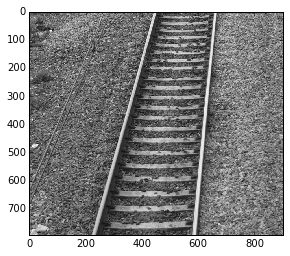

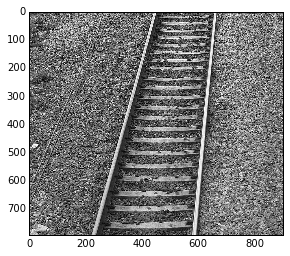

In [117]:
railway_im = io.imread(Path.__add__('railway.jpg'),as_grey=True)
plt.figure()
io.imshow(railway_im)

from scipy.ndimage import filters
railway_lap = filters.laplace(railway_im)

railway_sharp=railway_im-railway_lap
plt.figure()
plt.imshow(railway_sharp,cmap =cm.gray, vmin =0 , vmax =1. )

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

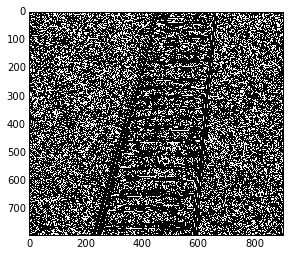

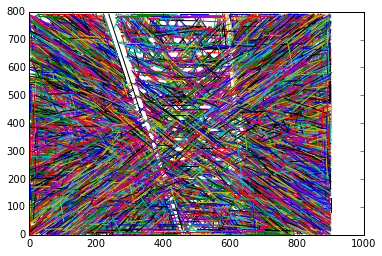

In [120]:
from skimage import transform
from skimage import feature

railway_primedge = feature.canny(railway_im)
plt.figure()
io.imshow(railway_primedge)

plt.figure()
lines = transform.probabilistic_hough_line(railway_primedge)


for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.show()
